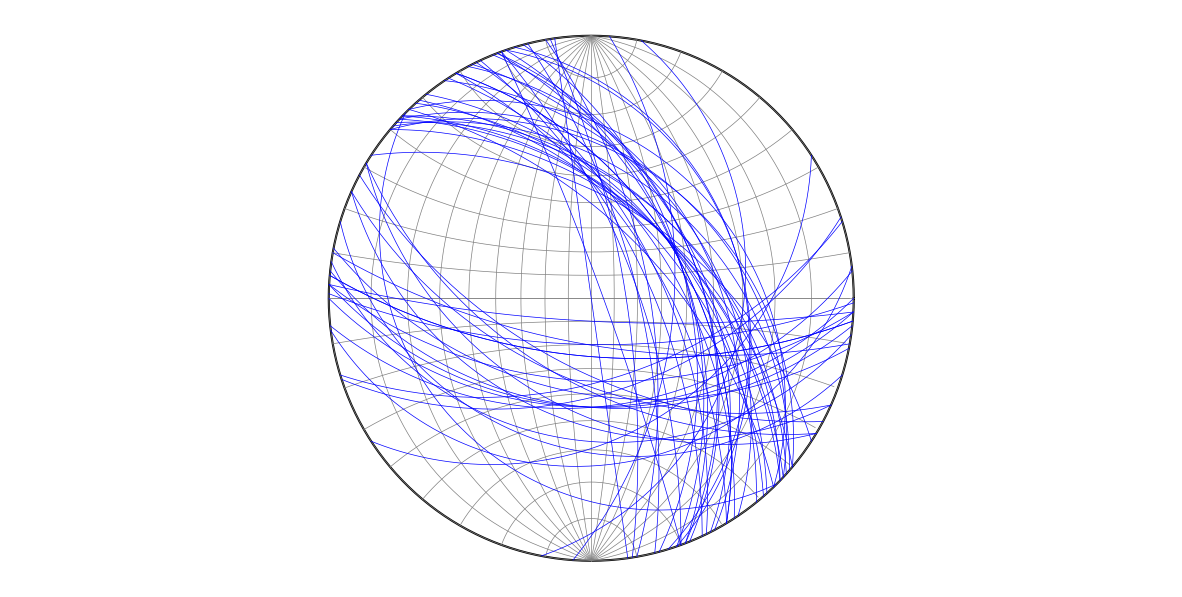

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

# Import Stereonet and related functions
import sys, os
sys.path.append(os.path.abspath("../functions"))
from pole import pole_from_plane, plane_from_pole
from great_circle import great_circle
from geogr_to_view import geogr_to_view
from stereonet import stereonet

# Draw a lower hemisphere equal angle stereonet, 
# 10 deg interval grid
trdv, plgv, intrad = np.radians([0, 90, 10]) 
fig, ax = stereonet(trdv,plgv,intrad,0)

# Read the strike-dip data from the Big Elk anticline
beasd=np.loadtxt(os.path.abspath("../data/ch5-6/beasd.txt"))

# Plot the great circles
for i in range(beasd.shape[0]):
    path = great_circle(beasd[i,0]*pi/180,
                        beasd[i,1]*pi/180,0)
    ax.plot(path[:,0], path[:,1], "b", linewidth=0.5)

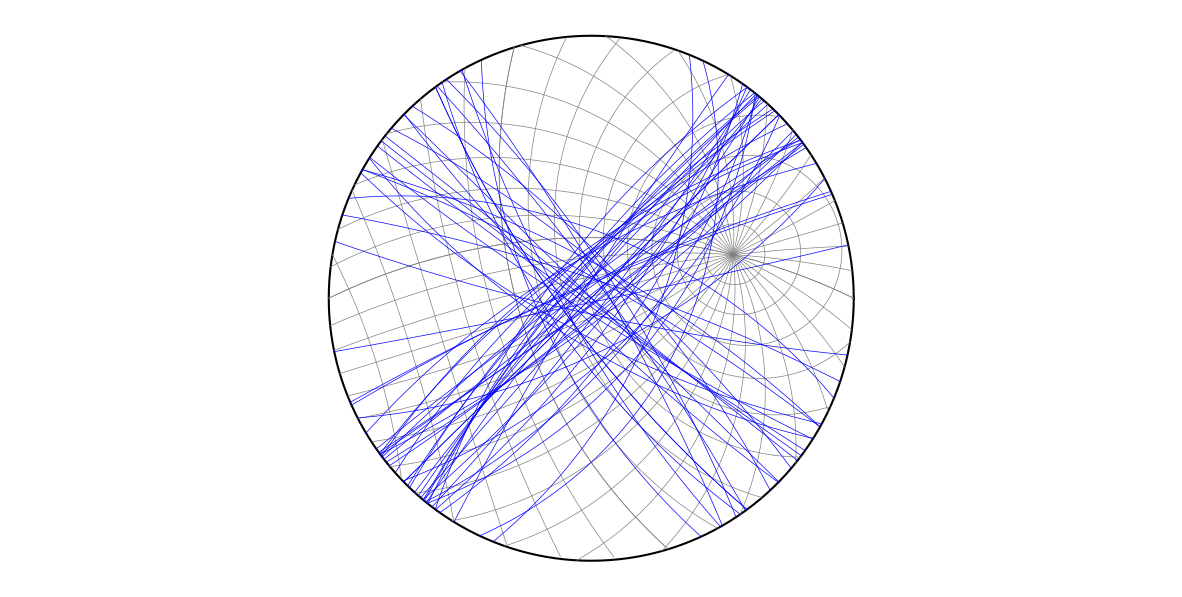

In [2]:
# Draw the same data in an equal angle stereonet,
# but make the view direction = fold axis
trdv, plgv = np.radians([125, 26]) 
fig, ax = stereonet(trdv,plgv,intrad,0)

# Plot the great circles
for i in range(beasd.shape[0]):
    # pole to bed
    trdp, plgp =  pole_from_plane(beasd[i,0]*pi/180,
                                  beasd[i,1]*pi/180)
    # transform pole
    trdpt, plgpt = geogr_to_view(trdp,plgp,trdv,plgv)
    # bed from transformed pole
    striket, dipt = plane_from_pole(trdpt,plgpt)
    # plot great circle
    path = great_circle(striket,dipt,0)
    ax.plot(path[:,0], path[:,1], "b", linewidth=0.5) 

In [ ]:
# if you want to save the stereonet run this cell
fig.savefig("stereonet.png", dpi=300)